# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [3]:
df = pd.read_excel('geo.xlsx')
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
X = df[['x', 'y']]

Нормируем

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.36791896,  0.15955291],
       [ 0.36791896,  0.15955291],
       [ 0.2931784 , -0.34813064],
       ...,
       [-1.20058354,  1.1836816 ],
       [-0.97563233,  0.38377766],
       [-0.95317246,  1.00936916]])

Делаем Kmeans

In [6]:
from sklearn.cluster import KMeans
clst = KMeans()
clst.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
clusters = clst.predict(X_scaled)

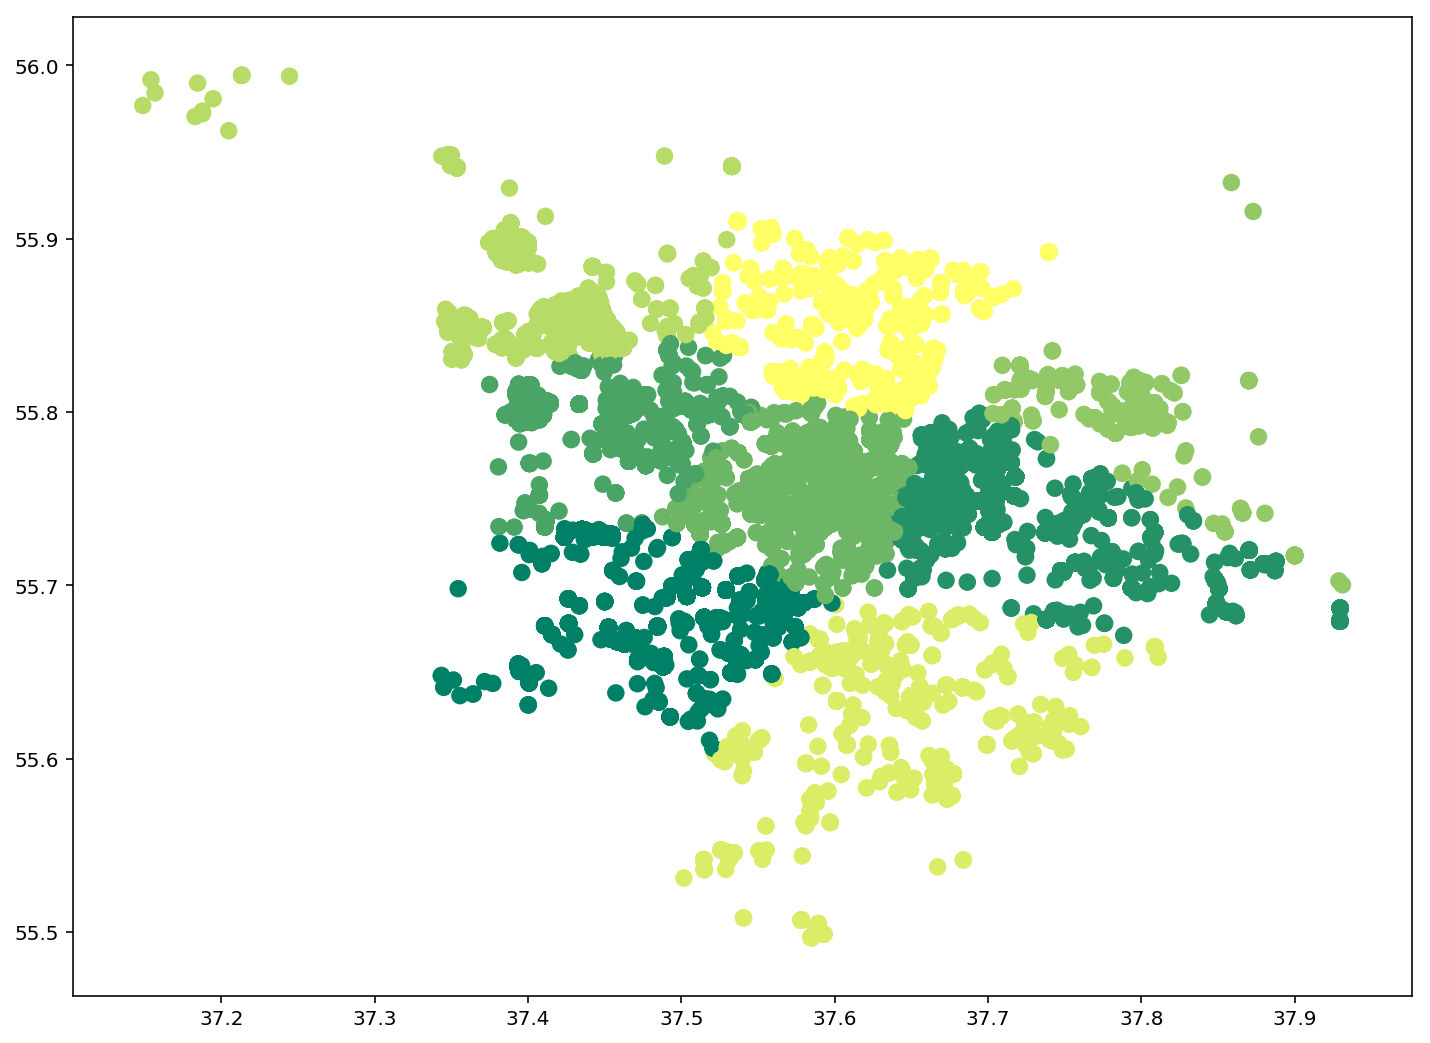

In [8]:
plt.scatter(X.values[:, 0], X.values[:, 1], c=clusters, cmap='summer', s=60)

Подберем оптимальное кол-во кластеров

In [9]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

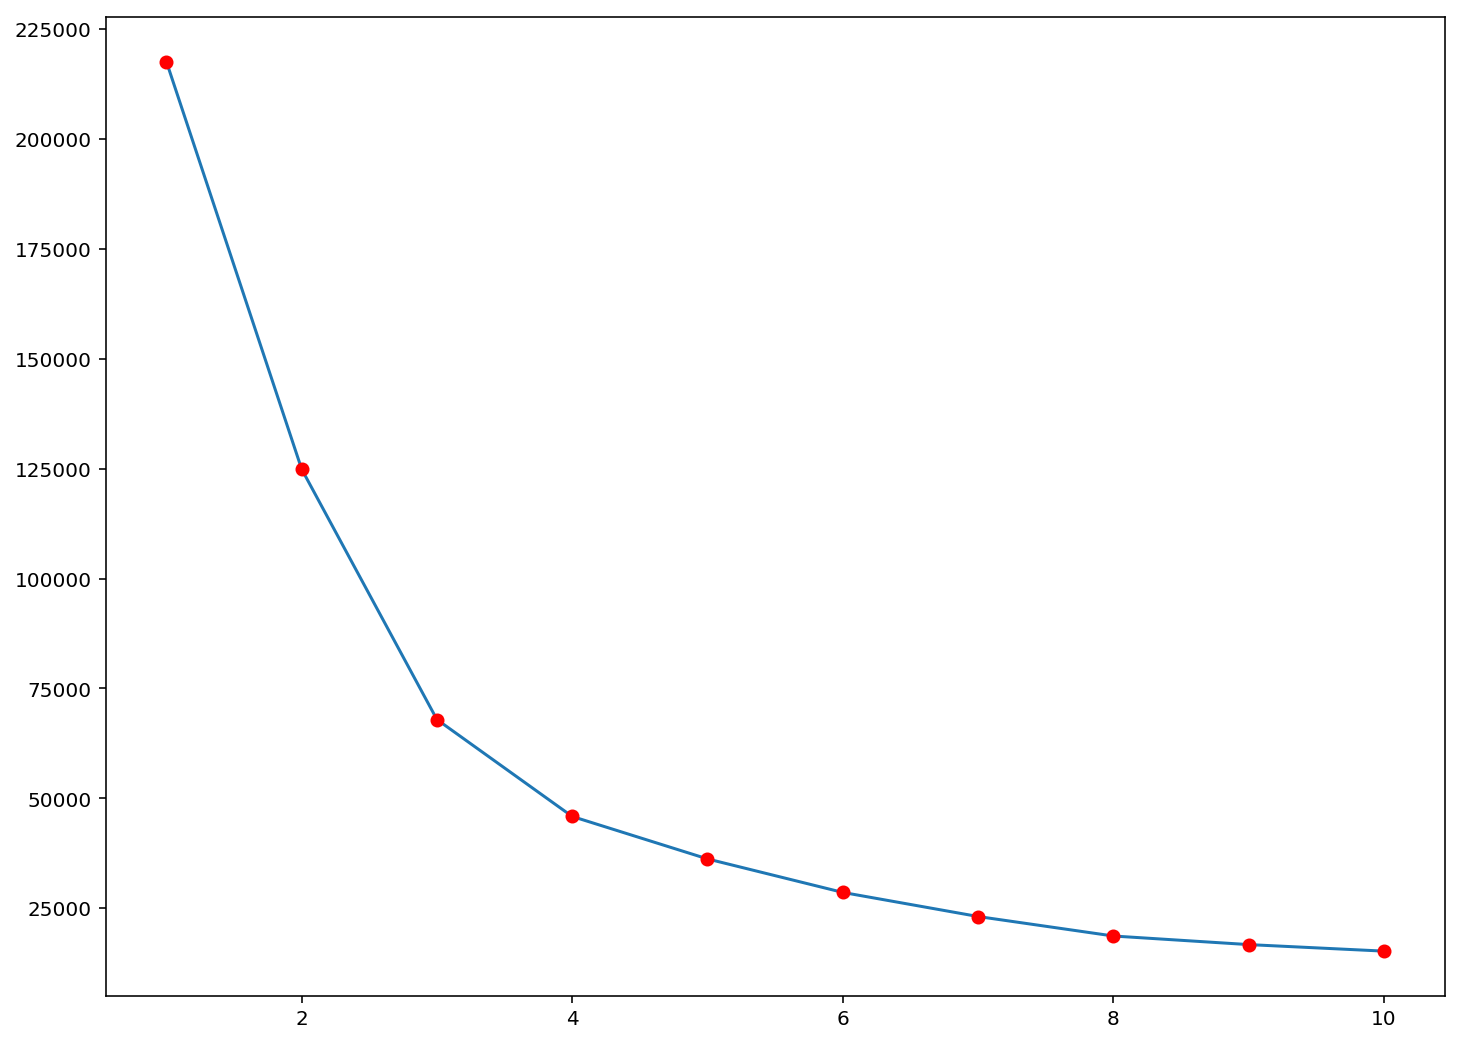

In [10]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

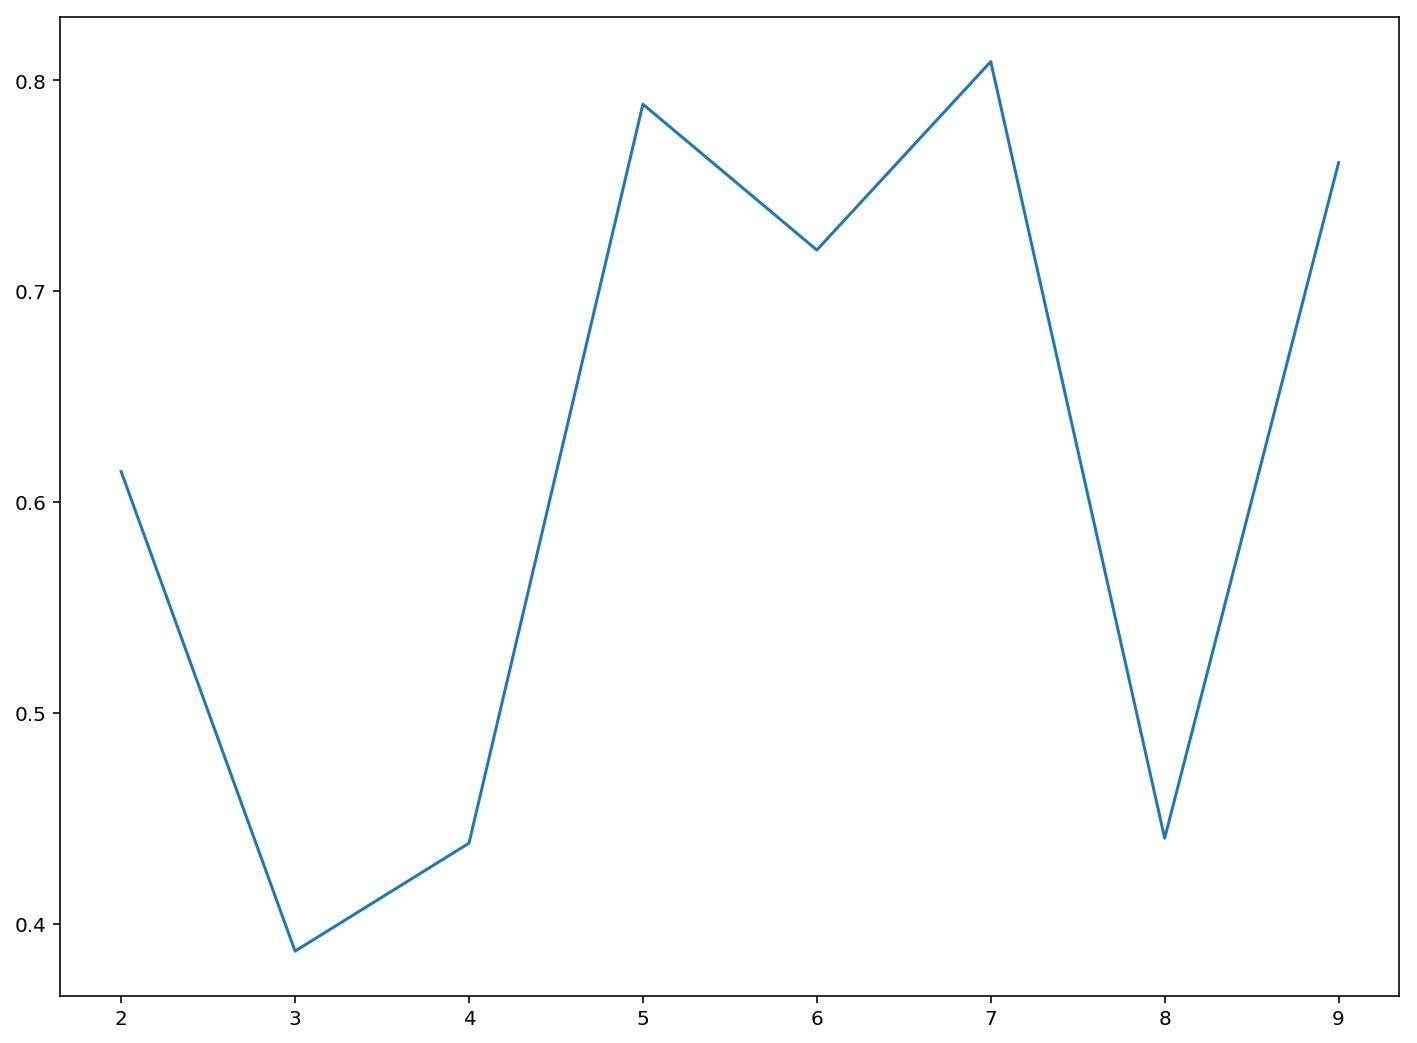

In [11]:
diff = np.diff(k_inertia)
#plt.plot(ks[1:], diff)
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)
#k_opt = ks[np.argmin(diff_r)+1]
#k_opt

### Оптимально 3 кластера

In [12]:
clst = KMeans(n_clusters=3)
clusters = clst.fit_predict(X_scaled)

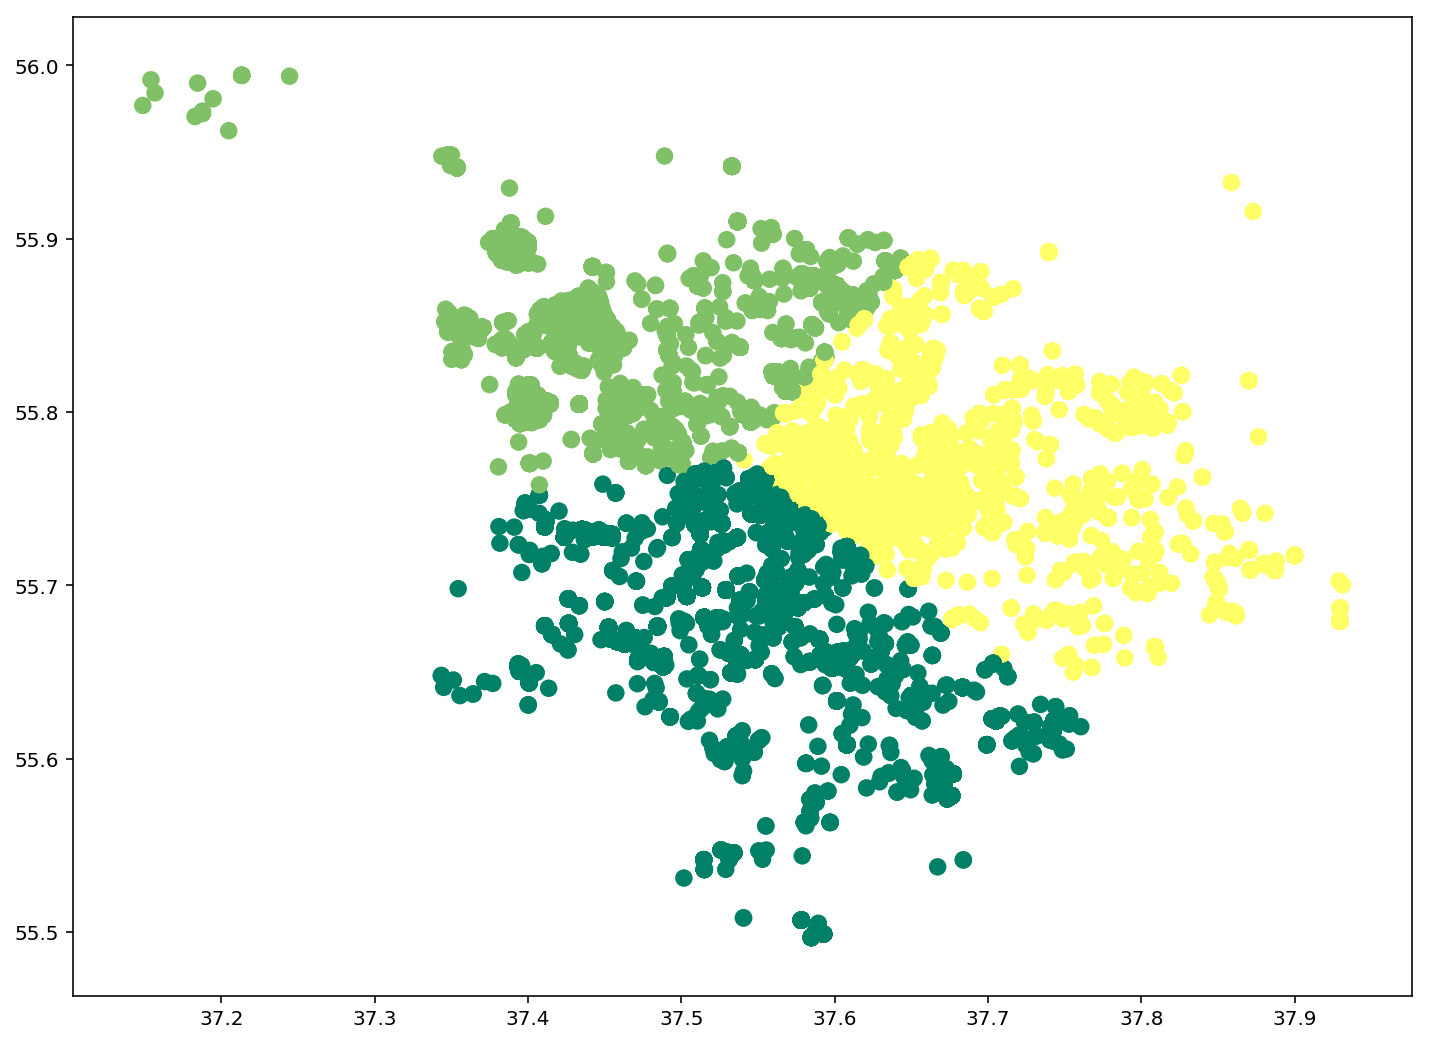

In [13]:
plt.scatter(X.values[:, 0], X.values[:, 1], c=clusters, cmap='summer', s=60)

### разделим на голоса за и против

In [14]:
X_negativ = df[df.comment_class == -1][['x','y']]
X_positiv = df[df.comment_class == 1][['x','y']]
X_positiv.head()

,x,y
28,37.588916,55.741982
45,37.589311,55.734273
46,37.558526,55.728758
47,37.566431,55.731794
61,37.589311,55.734273


### Посмотрим как распределились голоса за и против

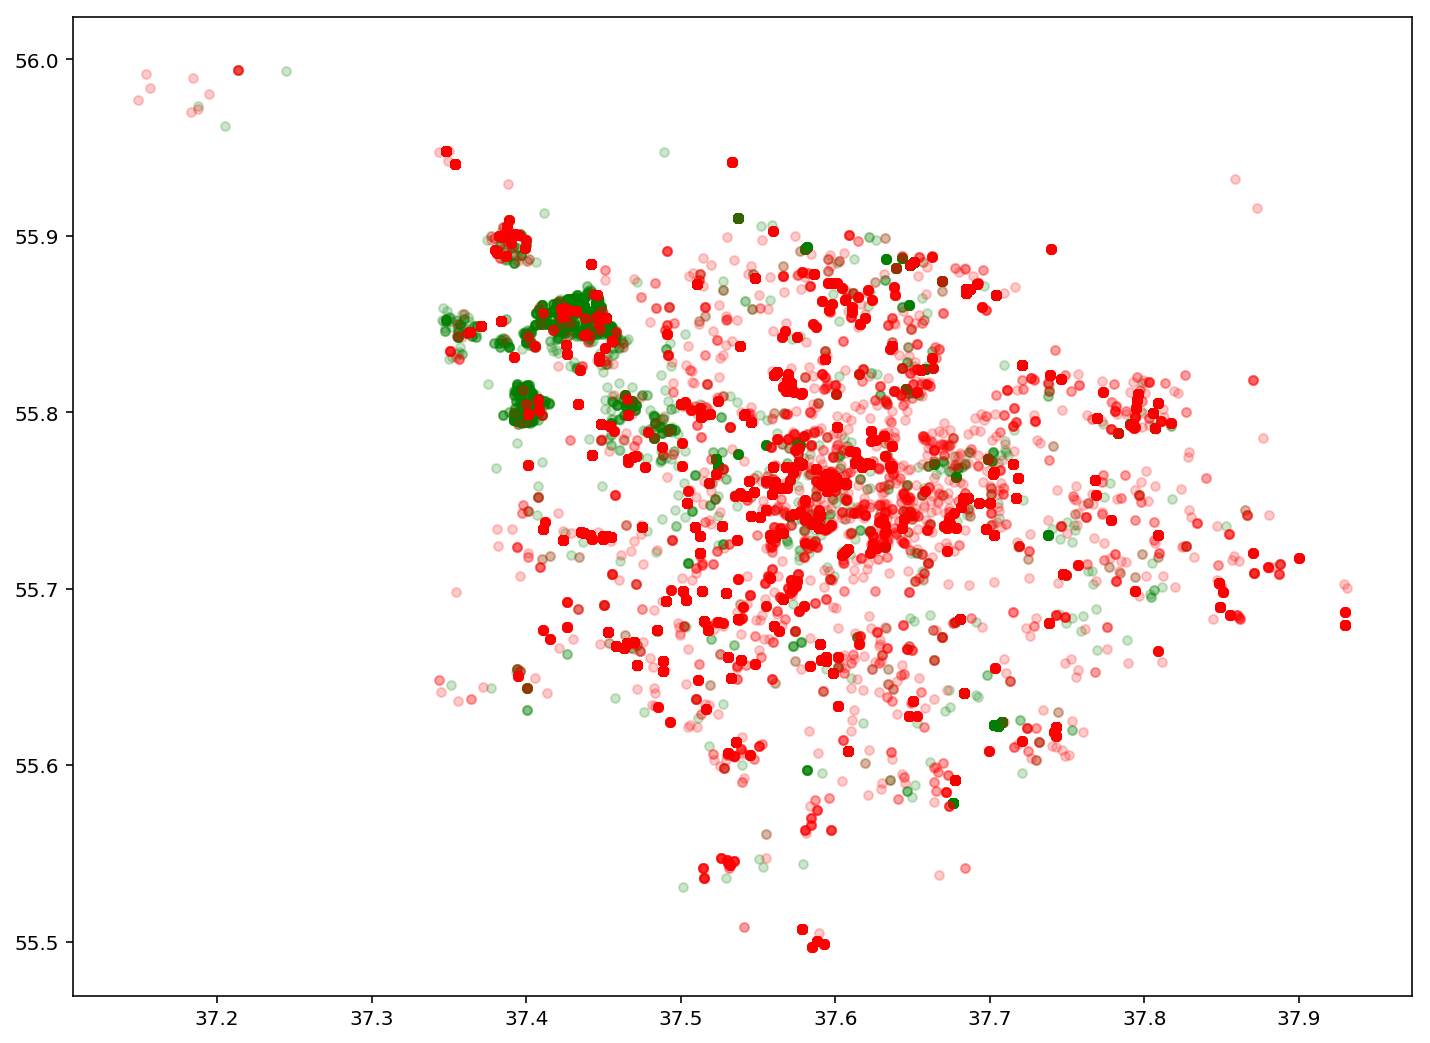

In [15]:
plt.scatter(X_positiv.values[:, 0], X_positiv.values[:, 1], c='green', s=20, alpha=0.2)
plt.scatter(X_negativ.values[:, 0], X_negativ.values[:, 1], c='red', s=20, alpha=0.2)

### Кластеризуем по отдельности за и против

In [16]:
X_positiv_scaled = scaler.fit_transform(X_positiv)
X_negativ_scaled = scaler.fit_transform(X_negativ)

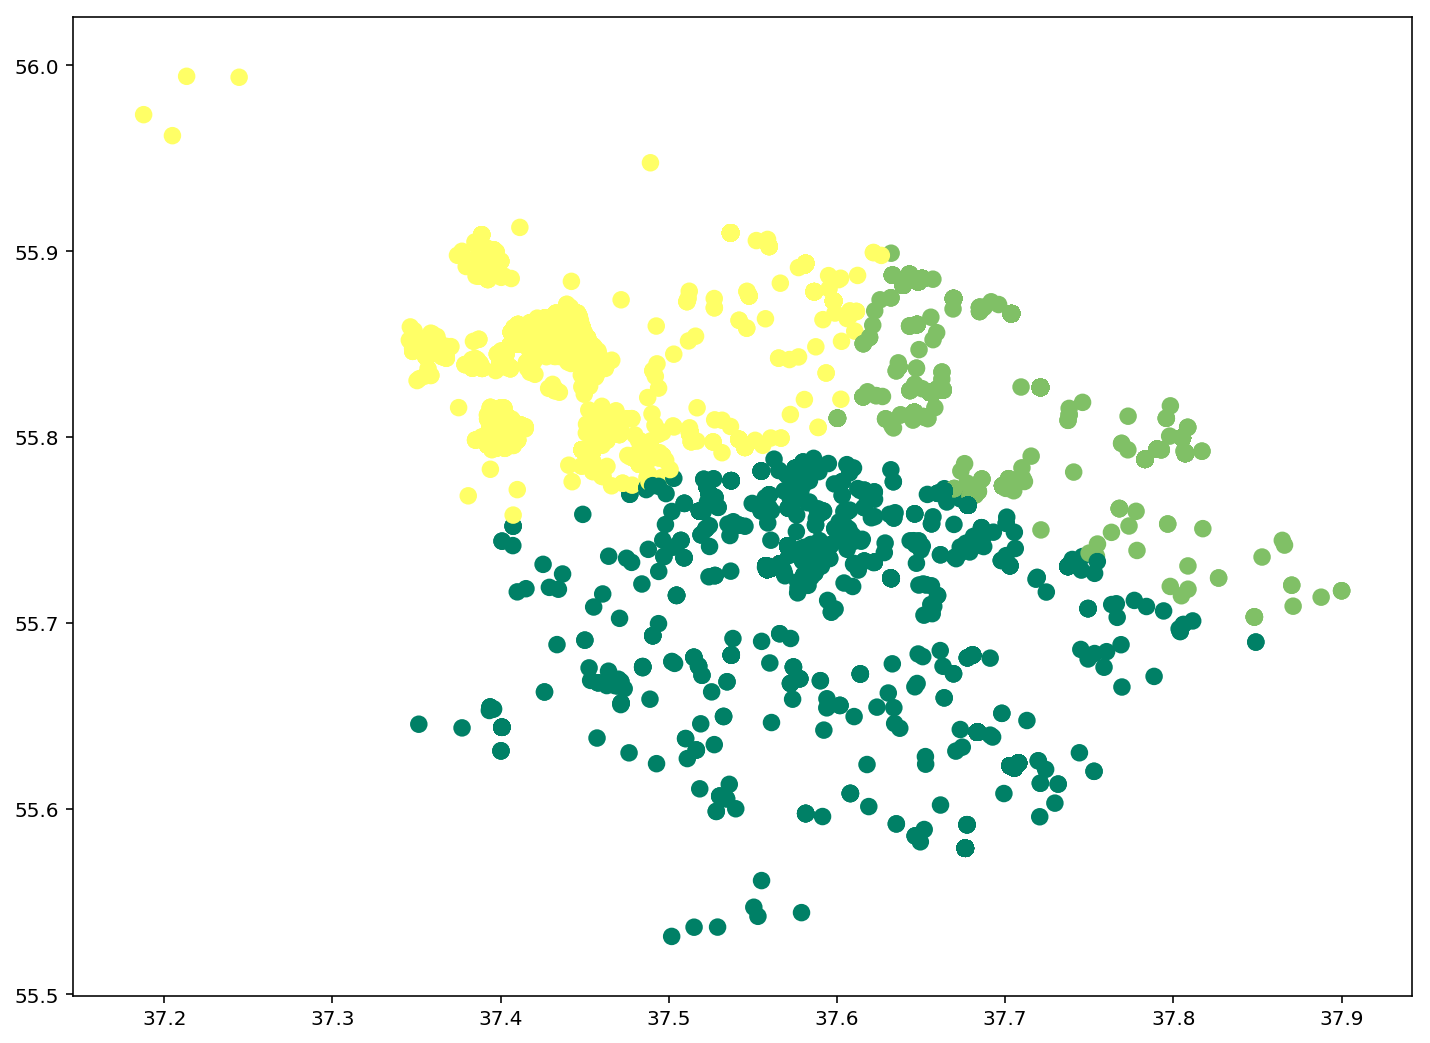

In [17]:
n_clusters = 3
clts_positiv = KMeans(n_clusters=n_clusters)
clts_negativ = KMeans(n_clusters=n_clusters)
c_positiv = clts_positiv.fit_predict(X_positiv_scaled)
c_negativ = clts_negativ.fit_predict(X_negativ_scaled)
plt.scatter(X_positiv.values[:, 0], X_positiv.values[:, 1], c=c_positiv, cmap='summer', s=60)

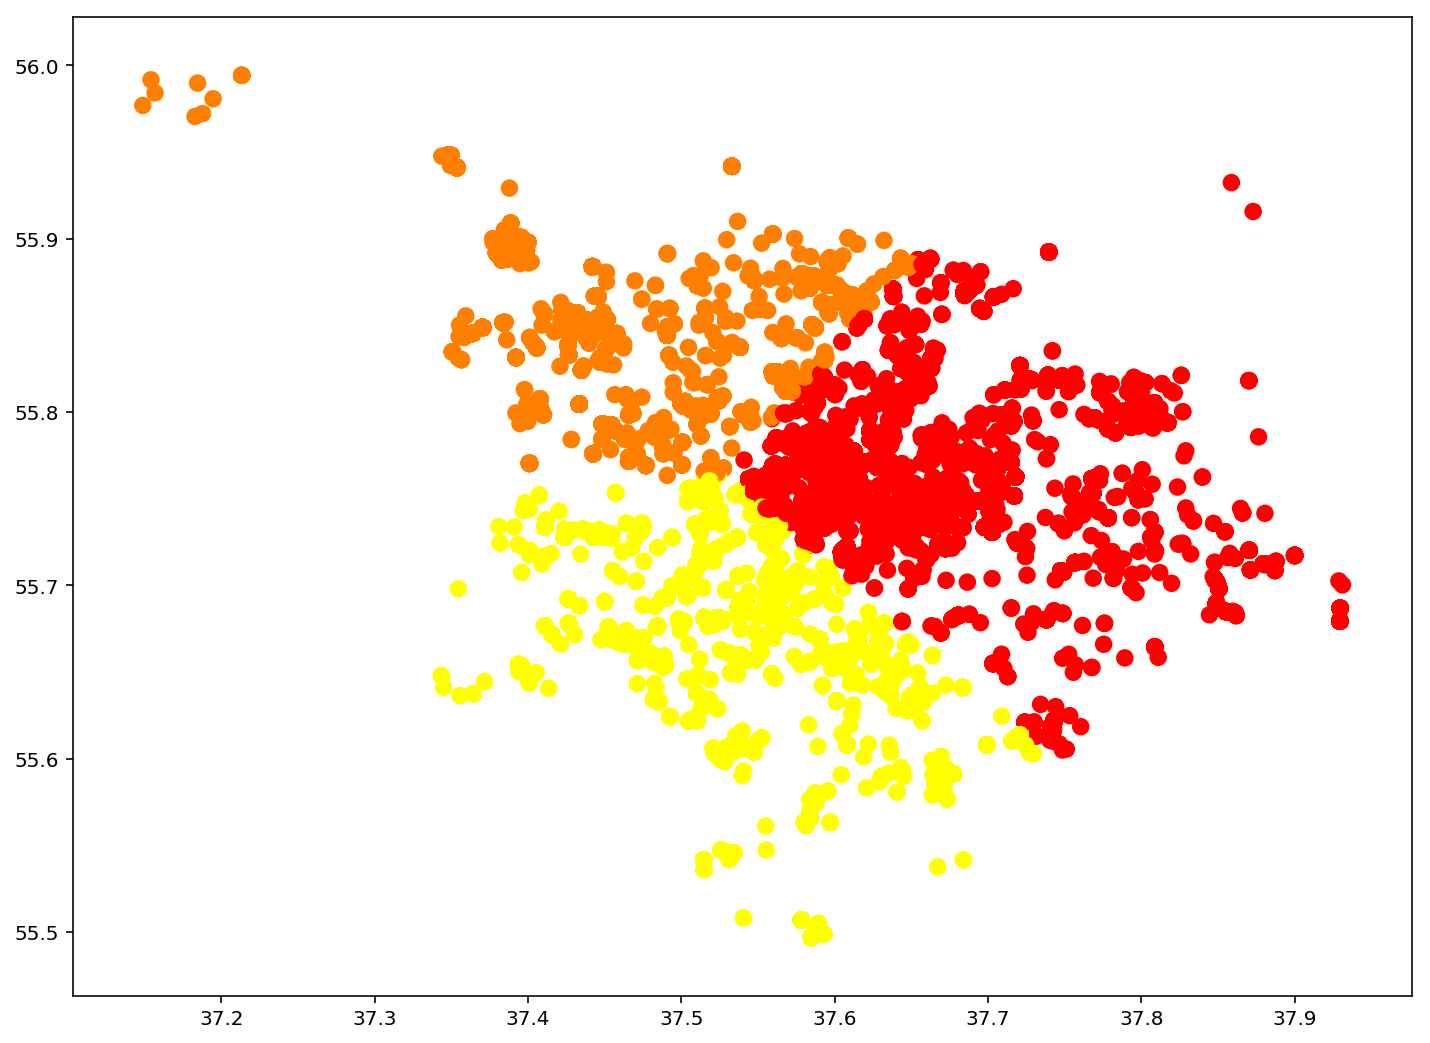

In [18]:
plt.scatter(X_negativ.values[:, 0], X_negativ.values[:, 1], c=c_negativ, cmap='autumn', s=60)

# Найдем наиболее активные в голосовании районы

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

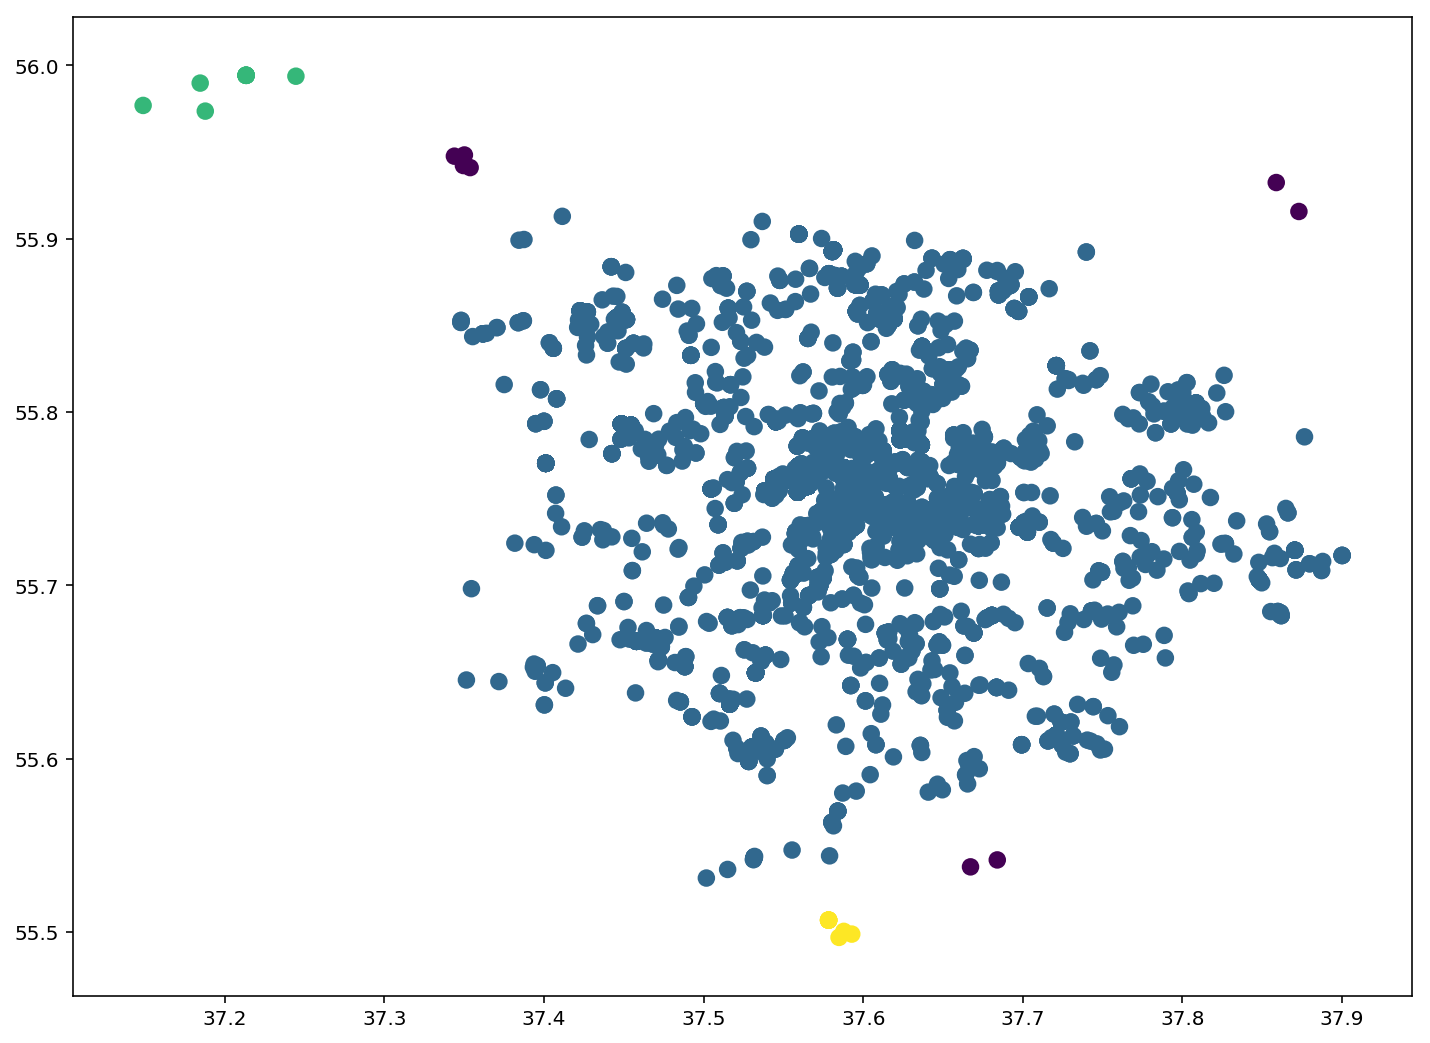

In [27]:
plt.scatter(X.values[:, 0], X.values[:, 1], c=clusters, s=60)